Loading dataset from cleanLoanData.csv...
Dataset loaded successfully.
    Income  Age  Experience  Married.Single  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

            Profession           STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  Mechanical_engineer  Madhya_Pradesh                3                 13   
1   Software_Developer     Maharashtra                9                 13   
2     Technical_writer          Kerala                4                 10   
3   Software_Developer          Odisha                2                 12   
4        Civil_servant      Tamil_Nadu                3         

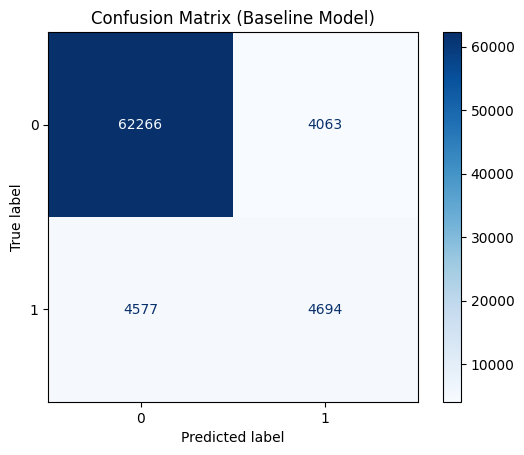

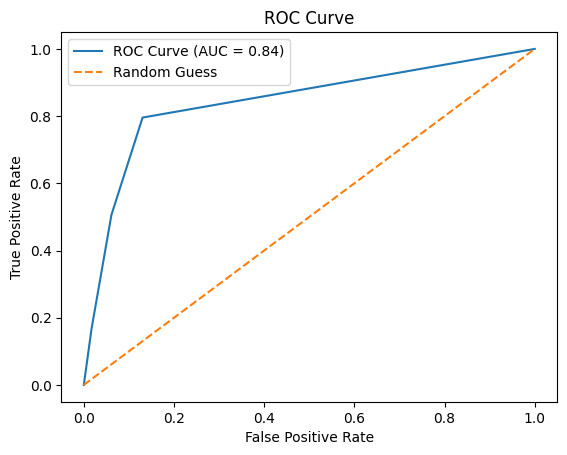


--- Iteration 2: Hyperparameter Tuning ---
Testing KNN model with k=3...
Training KNN model with k=3...
Accuracy for k=3: 88.57%
Testing KNN model with k=5...
Training KNN model with k=5...
Accuracy for k=5: 88.85%
Testing KNN model with k=7...
Training KNN model with k=7...
Accuracy for k=7: 89.17%
Testing KNN model with k=9...
Training KNN model with k=9...
Accuracy for k=9: 89.11%
Plotting Accuracy vs. K...


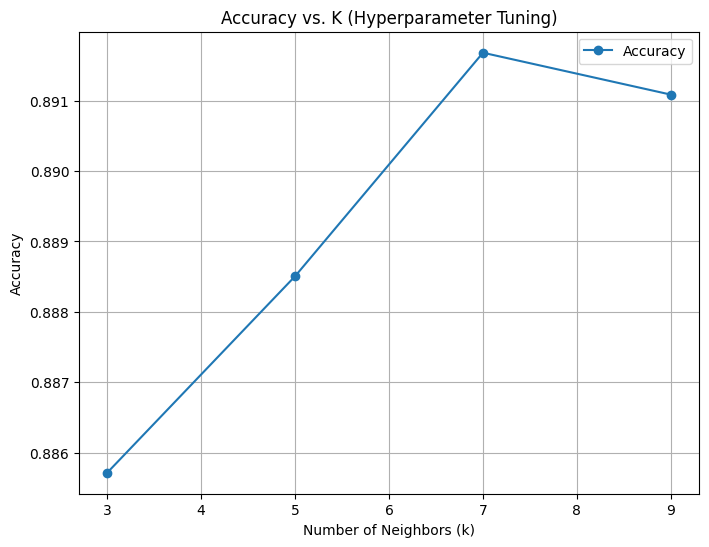

Best k value: 7

--- Iteration 3: Handling Class Imbalance (SMOTE) ---
Class distribution before SMOTE: {0: 154675, 1: 21725}
Class distribution after SMOTE: {0: 154675, 1: 154675}
Training KNN model with k=3...
Evaluating the model...
Accuracy: 86.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     66329
           1       0.45      0.57      0.50      9271

    accuracy                           0.86     75600
   macro avg       0.69      0.74      0.71     75600
weighted avg       0.88      0.86      0.87     75600



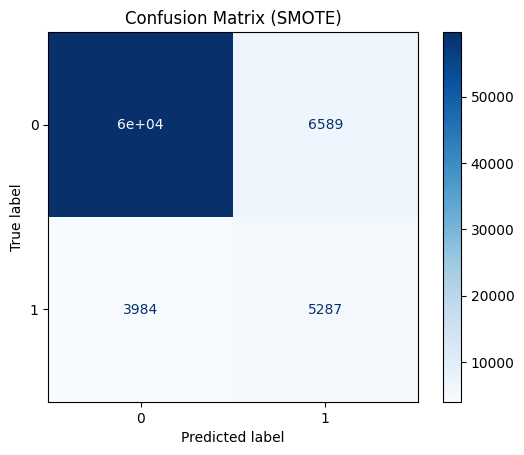

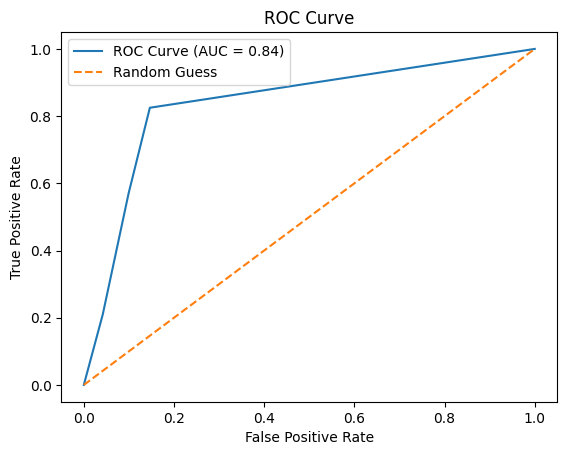

In [3]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Helper Functions

# Load Dataset
def load_dataset(csv_file):
    print(f"Loading dataset from {csv_file}...")
    data = pd.read_csv(csv_file)
    print("Dataset loaded successfully.")
    print(data.head())
    return data


# Preprocess Dataset
def preprocess_data(data):
    print("Checking for missing values...")
    print(data.isnull().sum())

    # Encode categorical variables
    print("Encoding categorical variables...")
    categorical_columns = data.select_dtypes(include=["object"]).columns
    for col in categorical_columns:
        print(f"Encoding '{col}' using One-Hot Encoding...")
        data = pd.get_dummies(data, columns=[col], drop_first=True)

    return data


# Split Data
def split_data(data):
    print("Splitting data into features (X) and target (y)...")
    X = data.drop(columns=["Risk_Flag"])
    y = data["Risk_Flag"]

    print("Performing train-test split...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
    return X_train, X_test, y_train, y_test


# Scale Features
def scale_features(X_train, X_test):
    print("Scaling numerical features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Feature scaling completed.")
    return X_train_scaled, X_test_scaled


# Train KNN Model
def train_knn(X_train, y_train, k=3):
    print(f"Training KNN model with k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn


# Evaluate Model
def evaluate_model(model, X_test, y_test, title="Confusion Matrix"):
    print("Evaluating the model...")
    y_pred = model.predict(X_test)

    # Print metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    disp.ax_.set_title(title)
    plt.show()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


# Main Script for Iterations

# Load and preprocess data
file_path = "cleanLoanData.csv"
data = load_dataset(file_path)
data = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(data)
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

# Iteration 1: Baseline Model
print("\n--- Iteration 1: Baseline Model ---")
baseline_model = train_knn(X_train_scaled, y_train, k=3)
evaluate_model(baseline_model, X_test_scaled, y_test, title="Confusion Matrix (Baseline Model)")

# Iteration 2: Hyperparameter Tuning
print("\n--- Iteration 2: Hyperparameter Tuning ---")
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    print(f"Testing KNN model with k={k}...")
    knn_model = train_knn(X_train_scaled, y_train, k=k)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.2%}")

# Plot Accuracy vs. K
print("Plotting Accuracy vs. K...")
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker="o", label="Accuracy")
plt.title("Accuracy vs. K (Hyperparameter Tuning)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k value: {best_k}")

# Iteration 3: Handling Class Imbalance with SMOTE
print("\n--- Iteration 3: Handling Class Imbalance (SMOTE) ---")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print("Class distribution before SMOTE:", y_train.value_counts().to_dict())
print("Class distribution after SMOTE:", y_train_balanced.value_counts().to_dict())

final_model = train_knn(X_train_balanced, y_train_balanced, k=3)
evaluate_model(final_model, X_test_scaled, y_test, title="Confusion Matrix (SMOTE)")


Loading dataset from cleanLoanData.csv...
Dataset loaded successfully.
    Income  Age  Experience  Married.Single  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

            Profession           STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  Mechanical_engineer  Madhya_Pradesh                3                 13   
1   Software_Developer     Maharashtra                9                 13   
2     Technical_writer          Kerala                4                 10   
3   Software_Developer          Odisha                2                 12   
4        Civil_servant      Tamil_Nadu                3         

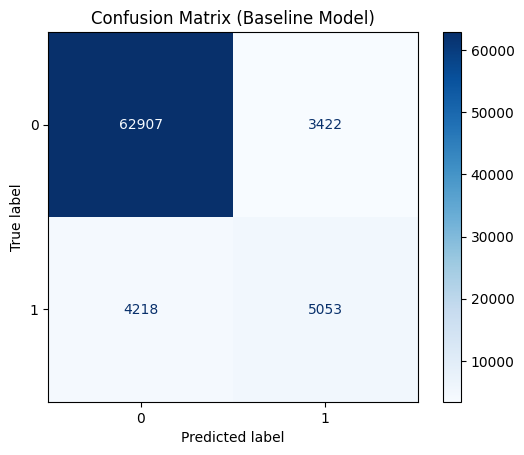

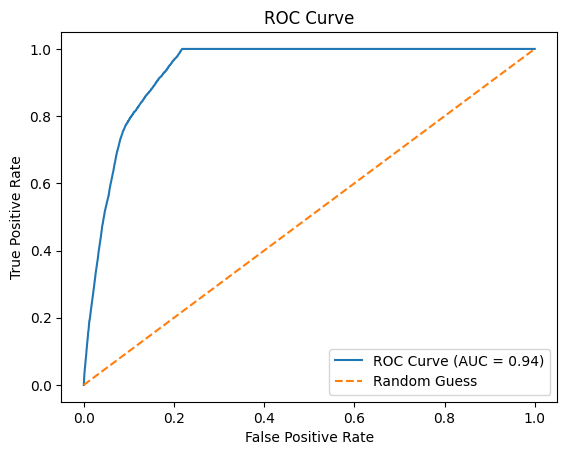


--- Iteration 2: Hyperparameter Tuning ---
Training Random Forest with n_estimators=150, max_depth=None, class_weight=None...
Random Forest training completed.
Evaluating the model...
Accuracy: 89.88%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66329
           1       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



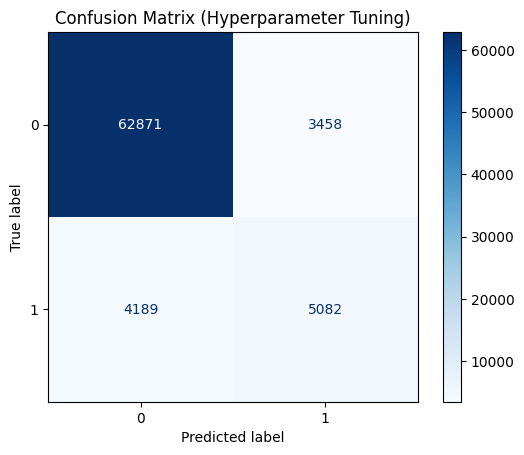

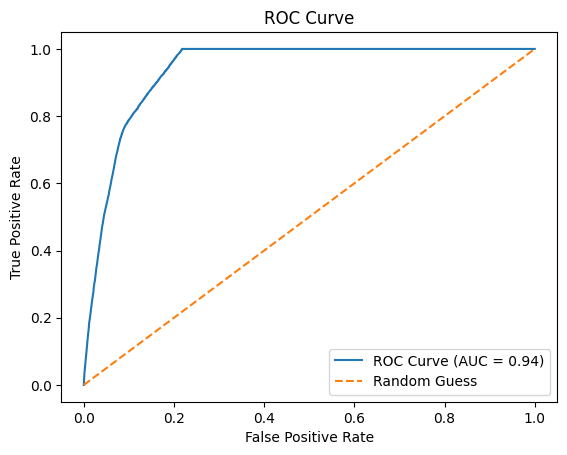

Plotting feature importance...


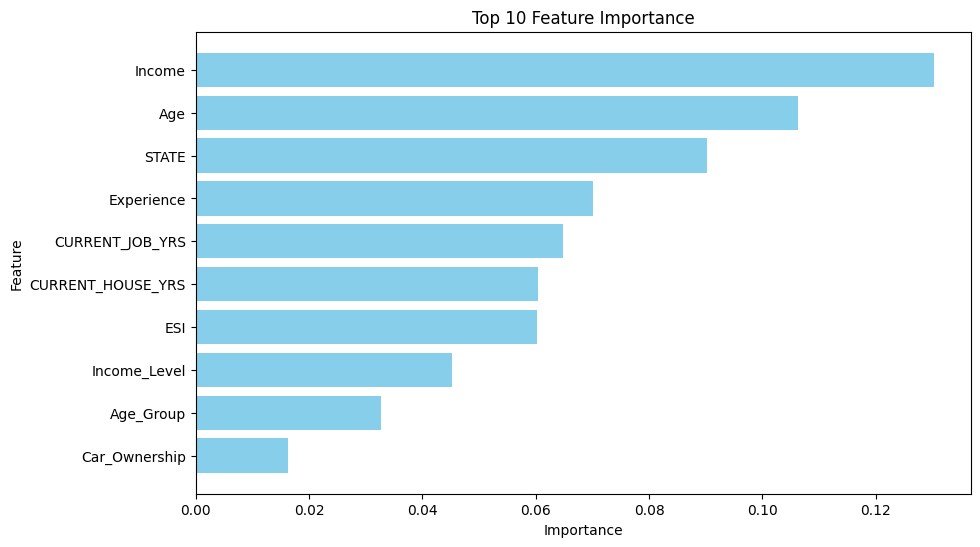


--- Iteration 3: Balanced Class Weights ---
Training Random Forest with n_estimators=150, max_depth=None, class_weight=balanced...
Random Forest training completed.
Evaluating the model...
Accuracy: 89.48%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66329
           1       0.55      0.77      0.64      9271

    accuracy                           0.89     75600
   macro avg       0.76      0.84      0.79     75600
weighted avg       0.91      0.89      0.90     75600



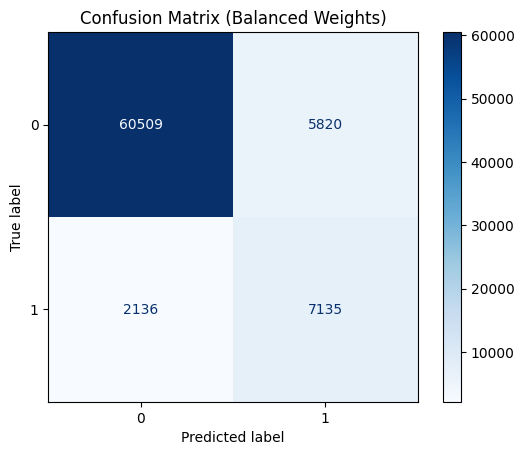

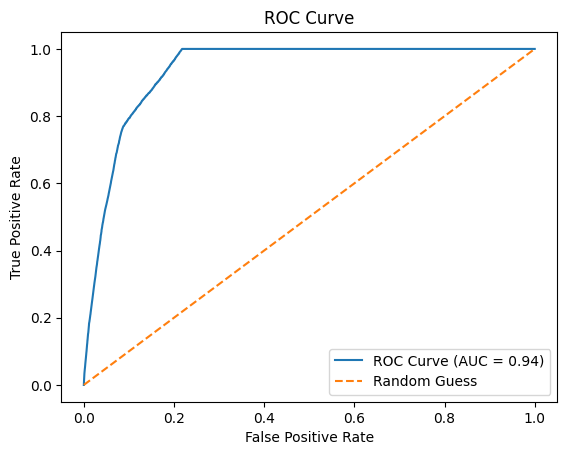

Plotting feature importance...


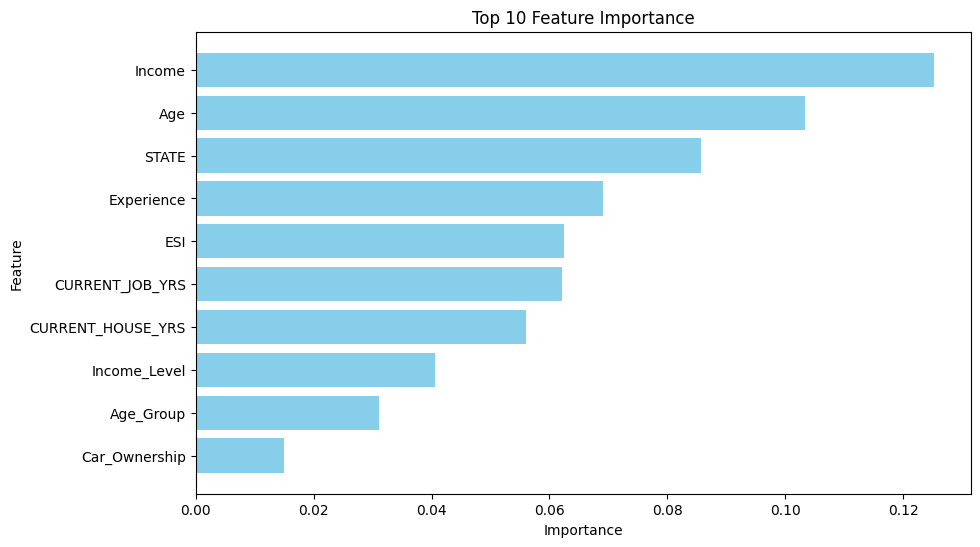

In [4]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt


# Helper Functions

# Load Dataset
def load_dataset(csv_file):
    print(f"Loading dataset from {csv_file}...")
    data = pd.read_csv(csv_file)
    print("Dataset loaded successfully.")
    print(data.head())
    return data


# Preprocess Dataset
def preprocess_data(data):
    print("Checking for missing values...")
    print(data.isnull().sum())

    # Encode categorical variables
    label_encoder = LabelEncoder()
    if 'STATE' in data.columns:
        data['STATE'] = label_encoder.fit_transform(data['STATE'])
    if 'Profession' in data.columns:
        data = pd.get_dummies(data, columns=['Profession'], drop_first=True)
    if 'Income_Level' in data.columns:
        data['Income_Level'] = label_encoder.fit_transform(data['Income_Level'])
    if 'Age_Group' in data.columns:
        data['Age_Group'] = label_encoder.fit_transform(data['Age_Group'])

    return data


# Split Data
def split_data(data):
    print("Splitting data into features (X) and target (y)...")
    X = data.drop(columns=['Risk_Flag'])
    y = data['Risk_Flag']

    print("Performing train-test split...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
    return X_train, X_test, y_train, y_test


# Scale Features
def scale_features(X_train, X_test):
    print("Scaling numerical features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Feature scaling completed.")
    return X_train_scaled, X_test_scaled


# Train Random Forest Model
def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None, class_weight=None):
    print(f"Training Random Forest with n_estimators={n_estimators}, max_depth={max_depth}, class_weight={class_weight}...")
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        class_weight=class_weight, 
        random_state=42
    )
    rf.fit(X_train, y_train)
    print("Random Forest training completed.")
    return rf


# Evaluate Model
def evaluate_model(model, X_test, y_test, title="Confusion Matrix"):
    print("Evaluating the model...")
    y_pred = model.predict(X_test)

    # Print metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    disp.ax_.set_title(title)
    plt.show()

    # Plot ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


# Plot Feature Importance
def plot_top_features(model, feature_names, top_n=10):
    print("Plotting feature importance...")
    importances = model.feature_importances_

    feature_data = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_data["Feature"], feature_data["Importance"], color="skyblue")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Top {top_n} Feature Importance")
    plt.gca().invert_yaxis()
    plt.show()


# Main Script for Iterations

# Load and preprocess data
file_path = "cleanLoanData.csv"
data = load_dataset(file_path)
data = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(data)
feature_names = X_train.columns
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

# Iteration 1: Baseline Model
print("\n--- Iteration 1: Baseline Model ---")
rf_model_1 = train_random_forest(X_train_scaled, y_train, n_estimators=100, max_depth=None)
evaluate_model(rf_model_1, X_test_scaled, y_test, title="Confusion Matrix (Baseline Model)")

# Iteration 2: Hyperparameter Tuning
print("\n--- Iteration 2: Hyperparameter Tuning ---")
rf_model_2 = train_random_forest(X_train_scaled, y_train, n_estimators=150, max_depth=None)
evaluate_model(rf_model_2, X_test_scaled, y_test, title="Confusion Matrix (Hyperparameter Tuning)")
plot_top_features(rf_model_2, feature_names, top_n=10)

# Iteration 3: Balanced Class Weights
print("\n--- Iteration 3: Balanced Class Weights ---")
rf_model_3 = train_random_forest(
    X_train_scaled, 
    y_train, 
    n_estimators=150, 
    max_depth=None, 
    class_weight="balanced"
)
evaluate_model(rf_model_3, X_test_scaled, y_test, title="Confusion Matrix (Balanced Weights)")
plot_top_features(rf_model_3, feature_names, top_n=10)
